
# Física Nuclear y de Partículas #

## Tema 1. Principales características del núcleo atómico.  ##


César Fernández Ramírez\
Departamento de Física Interdisciplinar\
Universidad Nacional de Eduación a Distancia

Versión: Junio 2024

Contenidos:

- Densidad nuclear de Woods-Saxon
- Potencial de Woods-Saxon
- Representación de la energía de ligadura por nucleón de los núcleos en función de $Z$ y $N$
- Energía de ligadura por nucleón en función de $A$ para el núcleo más estable dado un $A$

Se hace uso de las energías de ligaduras de los núcleos recopilados en la base de datos de la Agencia Internacional de la Energía Atómica (IAEA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import pandas as pd

jpac_blue   = "#1F77B4"; jpac_red    = "#D61D28";
jpac_green  = "#2CA02C"; jpac_orange = "#FF7F0E";
jpac_purple = "#9467BD"; jpac_brown  = "#8C564B";
jpac_pink   = "#E377C2"; jpac_gold   = "#BCBD22";
jpac_aqua   = "#17BECF"; jpac_grey   = "#7F7F7F";

jpac_color = [jpac_blue, jpac_red, jpac_green, 
              jpac_orange, jpac_purple, jpac_brown,
              jpac_pink, jpac_gold, jpac_aqua, jpac_grey, 'black' ];

jpac_axes = jpac_color[10]
dashes = 60*'-'

# the service URL
livechart = "https://nds.iaea.org/relnsd/v1/data?"

# There have been cases in which the service returns an HTTP Error 403: Forbidden
# use this workaround
import urllib.request
def lc_pd_dataframe(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))

df = lc_pd_dataframe(livechart + "fields=ground_states&nuclides=all")
df = df[pd.to_numeric(df['binding'],errors='coerce').notna()]
df['binding'] /= 1000
df['A'] = df['n']+df['z']

### Potencial de Woods-Saxon y densidad nuclear ###

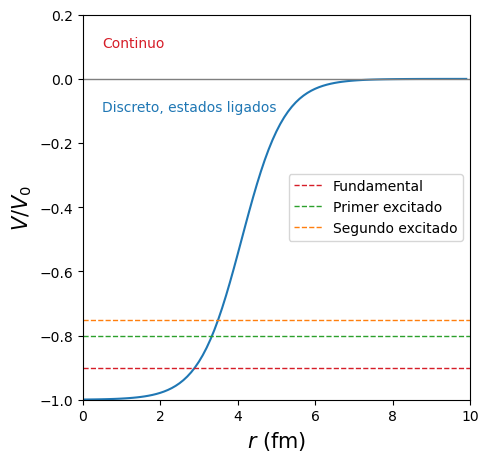

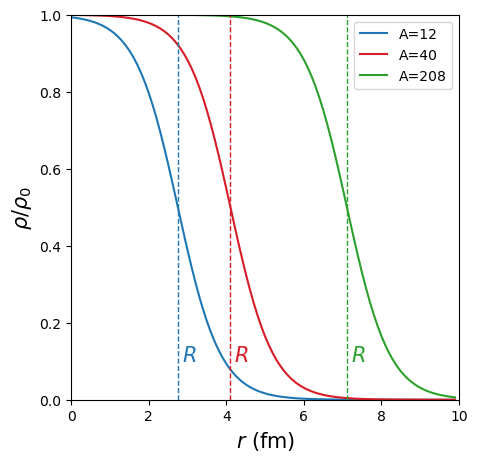

In [2]:
# A: Número de nucleones
# r0: constante, ha de ser 1.22
# a: espesor de la corteza

def radio(r0,A):
    return  r0*(A**(1/3))

def densidadnuclear(r0,A,a,r):
    R = radio(r0,A)
    return 1./(1.+np.exp((r-R)/a))

def WoodsSaxon(r0,A,a,r):
    R = radio(r0,A)
    return -1./(1.+np.exp((r-R)/a))

fig = plt.figure(figsize=(5,5))
r = np.arange(0.,10.,0.1)
plt.ylabel(r'$V/V_0$',fontsize=15)
plt.xlabel(r'$r$ (fm)',fontsize=15)
plt.xlim((0.,10.))
plt.ylim((-1.,0.2))
plt.plot(r,WoodsSaxon(1.2,40,0.55,r),'-',c=jpac_color[0])
plt.hlines(-0.90,0.,10.,colors=jpac_color[1], lw=1., linestyles='dashed',label='Fundamental')
plt.hlines(-0.80,0.,10.,colors=jpac_color[2], lw=1., linestyles='dashed',label='Primer excitado')
plt.hlines(-0.75,0.,10.,colors=jpac_color[3], lw=1., linestyles='dashed',label='Segundo excitado')
plt.hlines(0.,0.,10.,colors=jpac_color[9], lw=1., linestyles='solid')
plt.text(0.5,-0.1,r'Discreto, estados ligados',c=jpac_color[0],fontsize=10)
plt.text(0.5,0.1,r'Continuo',c=jpac_color[1],fontsize=10)
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()    

fig = plt.figure(figsize=(5,5))
r = np.arange(0.,10.,0.1)
plt.ylabel(r'$\rho/\rho_0$',fontsize=15)
plt.xlabel(r'$r$ (fm)',fontsize=15)
plt.xlim((0.,10.))
plt.ylim((0.,1.))
plt.plot(r,densidadnuclear(1.2,12,0.55,r),'-',c=jpac_color[0],label='A=12')
plt.plot(r,densidadnuclear(1.2,40,0.55,r),'-',c=jpac_color[1],label='A=40')
plt.plot(r,densidadnuclear(1.2,208,0.55,r),'-',c=jpac_color[2],label='A=208')
plt.vlines(radio(1.2,12),0.,1.,colors=jpac_color[0], lw=1., linestyles='dashed')
plt.vlines(radio(1.2,40),0.,1.,colors=jpac_color[1], lw=1., linestyles='dashed')
plt.vlines(radio(1.2,208),0.,1.,colors=jpac_color[2], lw=1., linestyles='dashed')
plt.text(radio(1.2,12)+0.1,0.1,r'$R$',c=jpac_color[0],fontsize=15)
plt.text(radio(1.2,40)+0.1,0.1,r'$R$',c=jpac_color[1],fontsize=15)
plt.text(radio(1.2,208)+0.1,0.1,r'$R$',c=jpac_color[2],fontsize=15)
plt.legend(loc='upper right',ncol=1,frameon=True)
plt.show()    

### Representación de la energía de ligadura por nucleón de los núcleos en función de $Z$ y $N$ ###

 
------------------------------------------------------------
IAEA NDS
------------------------------------------------------------
Número de núcleos en la base de datos: 3357
Par-Par:      847
Par-Impar:    855
Impar-Par:    818
Impar-Impar:  837
Comprobación. Total núcleos: 3357
 
------------------------------------------------------------
Número de núcleos estables en la base de datos: 244
Par-Par:      140
Par-Impar:    52
Impar-Par:    48
Impar-Impar:  4
Comprobación. Total núcleos estables: 244


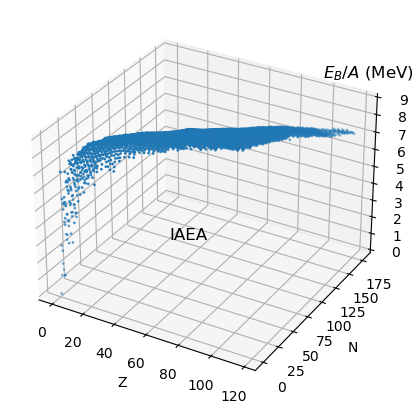

In [3]:
dfparpar = df.loc[ ((df['z']%2==0) & (df['n']%2==0))]
dfimparimpar = df.loc[ ((df['z']%2!=0) & (df['n']%2!=0))]
dfparimpar = df.loc[ ((df['z']%2==0) & (df['n']%2!=0))]
dfimparpar = df.loc[ ((df['z']%2!=0) & (df['n']%2==0))]

print(' '); print(dashes); print('IAEA NDS'); print(dashes);
print('Número de núcleos en la base de datos:',df['n'].count())
print('Par-Par:     ', dfparpar['z'].count())
print('Par-Impar:   ', dfparimpar['z'].count())
print('Impar-Par:   ', dfimparpar['z'].count())
print('Impar-Impar: ', dfimparimpar['z'].count())
total = dfparpar['z'].count()+ dfimparimpar['z'].count() +dfparimpar['z'].count()+dfimparpar['z'].count() 
print('Comprobación. Total núcleos:', total )

df_es = df.loc[(df['half_life']=='STABLE' )]
dfparpar_es = df_es.loc[ ((df_es['z']%2==0) & (df_es['n']%2==0))]
dfimparimpar_es = df_es.loc[ ((df_es['z']%2!=0) & (df_es['n']%2!=0))]
dfparimpar_es = df_es.loc[ ((df_es['z']%2==0) & (df_es['n']%2!=0))]
dfimparpar_es = df_es.loc[ ((df_es['z']%2!=0) & (df_es['n']%2==0))]

print(' '); print(dashes)
print('Número de núcleos estables en la base de datos:',df_es['n'].count())
print('Par-Par:     ', dfparpar_es['z'].count())
print('Par-Impar:   ', dfparimpar_es['z'].count())
print('Impar-Par:   ', dfimparpar_es['z'].count())
print('Impar-Impar: ', dfimparimpar_es['z'].count())
total_es = dfparpar_es['z'].count()+ dfimparimpar_es['z'].count() +dfparimpar_es['z'].count()+dfimparpar_es['z'].count() 
print('Comprobación. Total núcleos estables:', total_es )

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(projection='3d')
ax.set_zlim((0.,9.))
ax.set_xlabel('Z')
ax.set_ylabel('N')
ax.set_zlabel(r'$E_B/A$ (MeV)')
ax.text(110,140,11,r'$E_B/A$ (MeV)',c=jpac_color[10],fontsize=12)
ax.text(50,50,3,'IAEA',c=jpac_color[10],fontsize=12)
ax.scatter(df['z'],df['n'],df['binding'],marker='o',s=1,c=jpac_color[0])
plt.show()
fig.savefig('BindingEnergy3DIAEA.pdf', bbox_inches='tight')   

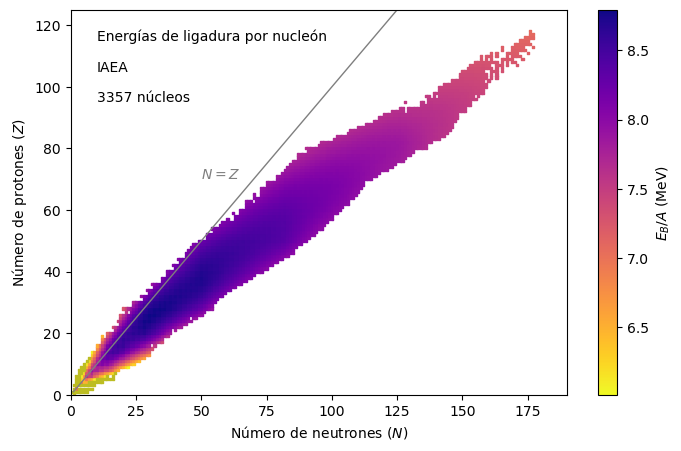

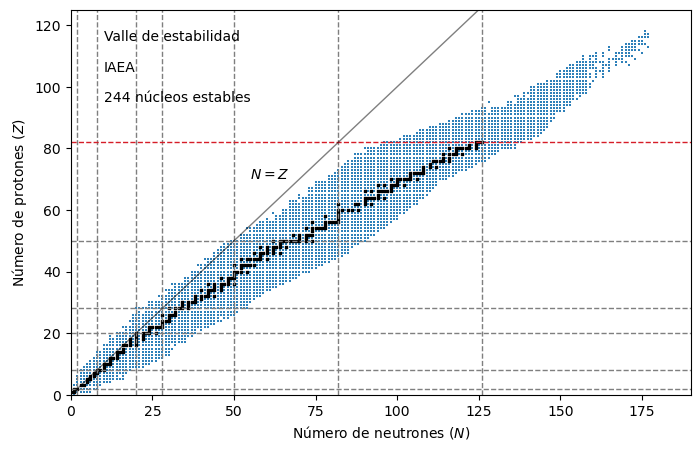

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
df1 = df.loc[(df['binding'] >= 6)]
df2 = df.loc[(df['binding'] < 6)]
ax.set_xlim((0,190))
ax.set_ylim((0,125))
x = np.linspace(1,125,125)
ax.plot(x,x,'-',lw=1,color=jpac_color[9])
ax.text(10,115,r'Energías de ligadura por nucleón',c=jpac_color[10],fontsize=10)
ax.text(10,105,r'IAEA',c=jpac_color[10],fontsize=10)
texto = str(df['n'].count()) + ' núcleos'
ax.text(10,95,texto,c=jpac_color[10],fontsize=10)
ax.text(50,70,r'$N=Z$',c=jpac_color[9],fontsize=10)
pa = ax.scatter(df1['n'],df1['z'],marker='s',s=2.5, c=df1['binding'], cmap='plasma_r')
fig.colorbar(pa,ax=ax,orientation='vertical',label=r'$E_B/A$ (MeV)')
ax.scatter(df2['n'],df2['z'],marker='s',s=2.5, c=jpac_color[7])
plt.show() 
fig.savefig('CartaNuclearIAEA.pdf', bbox_inches='tight')   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
ax.set_xlim((0,190))
ax.set_ylim((0,125))
plt.hlines( [2,8,20,28,50,126], 0, 190,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines( [2,8,20,28,50,82,126], 0, 125,colors=jpac_color[9], lw=1., linestyles='dashed')

plt.hlines( 82, 0, 190,colors=jpac_color[1], lw=1., linestyles='dashed')

ax.plot(x,x,'-',lw=1,color=jpac_color[10],alpha=0.5)
ax.text(10,115,r'Valle de estabilidad',c=jpac_color[10],fontsize=10)
ax.text(10,105,r'IAEA',c=jpac_color[10],fontsize=10)
texto = str(df_es['n'].count()) + ' núcleos estables'
ax.text(10,95,texto,c=jpac_color[10],fontsize=10)
ax.text(55,70,r'$N=Z$',c=jpac_color[10],fontsize=10)
ax.scatter(df['n'],df['z'],marker='s',s=2, c=jpac_color[0],edgecolors='white',lw=0.05)
ax.scatter(df_es['n'],df_es['z'],marker='s',s=2, c=jpac_color[10])
plt.show() 
fig.savefig('ValleEstabilidadIAEA.pdf', bbox_inches='tight') 

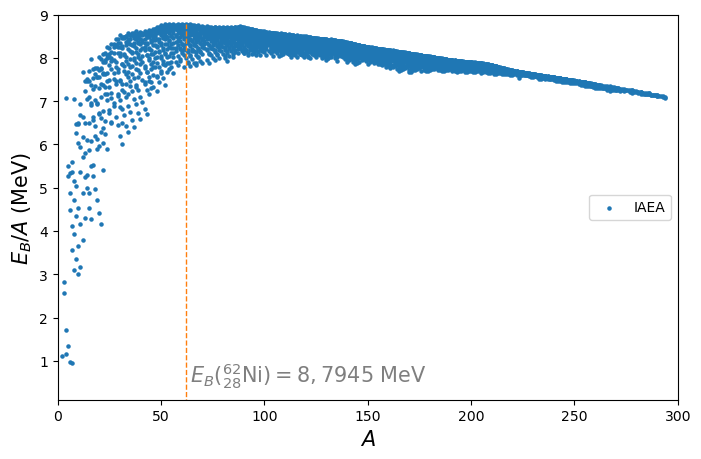

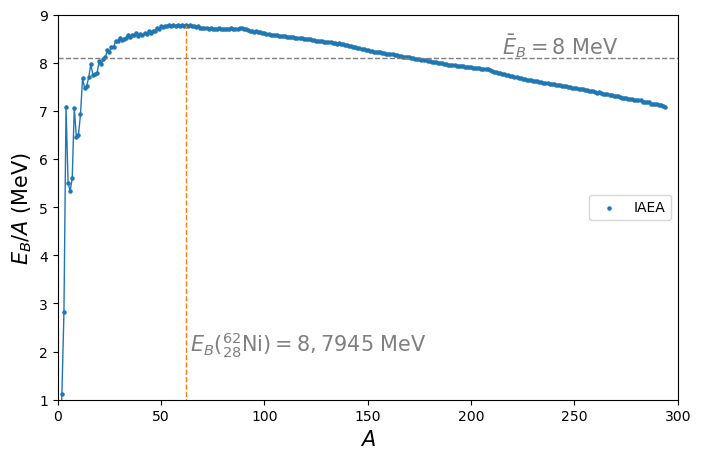

In [5]:
gdf = df.groupby('A')
maxavEbinda = gdf.apply(lambda t: t[t.binding==t.binding.max()])

fig = plt.figure(figsize=(8,5))
plt.ylabel(r'$E_B/A$ (MeV)',fontsize=15)
plt.xlabel(r'$A$',fontsize=15)
plt.ylim((0.1,9))
plt.xlim((0,300))
plt.vlines(62,0,df['binding'].max(),colors=jpac_color[3], lw=1., linestyles='dashed')
plt.scatter(df['A'], df['binding'],marker='o',s=5,c=jpac_color[0],label='IAEA')
plt.text(64,0.5,r'$E_B(^{62}_{28}$Ni$)=8,7945$ MeV',c=jpac_color[9],fontsize=15)
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()  
fig.savefig('BEIAEA.pdf', bbox_inches='tight')   

fig = plt.figure(figsize=(8,5))
plt.ylabel(r'$E_B/A$ (MeV)',fontsize=15)
plt.xlabel(r'$A$',fontsize=15)
plt.ylim((1,9))
plt.xlim((0,300))
plt.hlines(8.09670568181818,0.,300.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines(62,0,maxavEbinda['binding'].max(),colors=jpac_color[3], lw=1., linestyles='dashed')
plt.scatter(maxavEbinda['A'], maxavEbinda['binding'],marker='o',s=5,c=jpac_color[0],label='IAEA')
plt.plot(maxavEbinda['A'], maxavEbinda['binding'],'-',lw=1,c=jpac_color[0])
plt.text(215,8.2,r'$\bar{E}_B=8$ MeV',c=jpac_color[9],fontsize=15)
plt.text(64,2,r'$E_B(^{62}_{28}$Ni$)=8,7945$ MeV',c=jpac_color[9],fontsize=15)
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()  